In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

In [2]:
# Set the start and end date for fetching stock data
start_date = "2016-01-01"
end_date = datetime.datetime.today().strftime('2025-02-18')

# Get historical data from the stock from January 1, 2016 to end_date
aapl = yf.Ticker("AAPL")
aapl_data = aapl.history(start=start_date, end=end_date)

In [3]:
display(aapl_data)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-01-04 00:00:00-05:00,23.214484,23.838907,23.076478,23.834381,270597600,0.00,0.0
2016-01-05 00:00:00-05:00,23.924876,23.947500,23.169235,23.237106,223164000,0.00,0.0
2016-01-06 00:00:00-05:00,22.750687,23.160182,22.594582,22.782360,273829600,0.00,0.0
2016-01-07 00:00:00-05:00,22.325351,22.653398,21.816311,21.820835,324377600,0.00,0.0
2016-01-08 00:00:00-05:00,22.295948,22.422642,21.890979,21.936226,283192000,0.00,0.0
...,...,...,...,...,...,...,...
2025-02-10 00:00:00-05:00,229.570007,230.589996,227.199997,227.649994,33115600,0.25,0.0
2025-02-11 00:00:00-05:00,228.199997,235.229996,228.130005,232.619995,53718400,0.00,0.0
2025-02-12 00:00:00-05:00,231.199997,236.960007,230.679993,236.869995,45243300,0.00,0.0


<h2/> Data Preprocessing

In [4]:
aapl_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2294 entries, 2016-01-04 00:00:00-05:00 to 2025-02-14 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2294 non-null   float64
 1   High          2294 non-null   float64
 2   Low           2294 non-null   float64
 3   Close         2294 non-null   float64
 4   Volume        2294 non-null   int64  
 5   Dividends     2294 non-null   float64
 6   Stock Splits  2294 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 143.4 KB


In [5]:
aapl_data[aapl_data.isnull().any(axis=1)]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,


In [6]:
aapl_data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

<h2/> EDA and Visualization

<h4/> Descriptive Statistics

In [7]:
print("Descriptive Statistics:")
display(aapl_data.describe())

Descriptive Statistics:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2294.000000,2294.000000,2294.000000,2294.000000,2.294000e+03,2294.00000,2294.000000
mean,103.293008,104.403983,102.269992,103.396391,1.063558e+08,0.00323,0.001744
std,66.283223,66.970159,65.656562,66.361503,5.822141e+07,0.02565,0.083515
min,20.596724,20.978908,20.475431,20.674532,2.323470e+07,0.00000,0.000000
25%,40.760657,41.086104,40.527442,40.781534,6.785415e+07,0.00000,0.000000
50%,94.258619,95.085957,93.316905,94.181965,9.328520e+07,0.00000,0.000000
75%,159.890058,162.118139,157.749660,160.334526,1.287210e+08,0.00000,0.000000
max,257.906429,259.814335,257.347047,258.735504,5.334788e+08,0.25000,4.000000


In [8]:
sns.set_style("darkgrid")       # Dark background with grid for contrast
sns.set_context("notebook")     # Optimized for Jupyter readability
sns.set_palette("husl")         # Vibrant, distinct colors
plt.rcParams['figure.figsize'] = (14, 6)  # Default figure size

<h4/> Time Series Plot

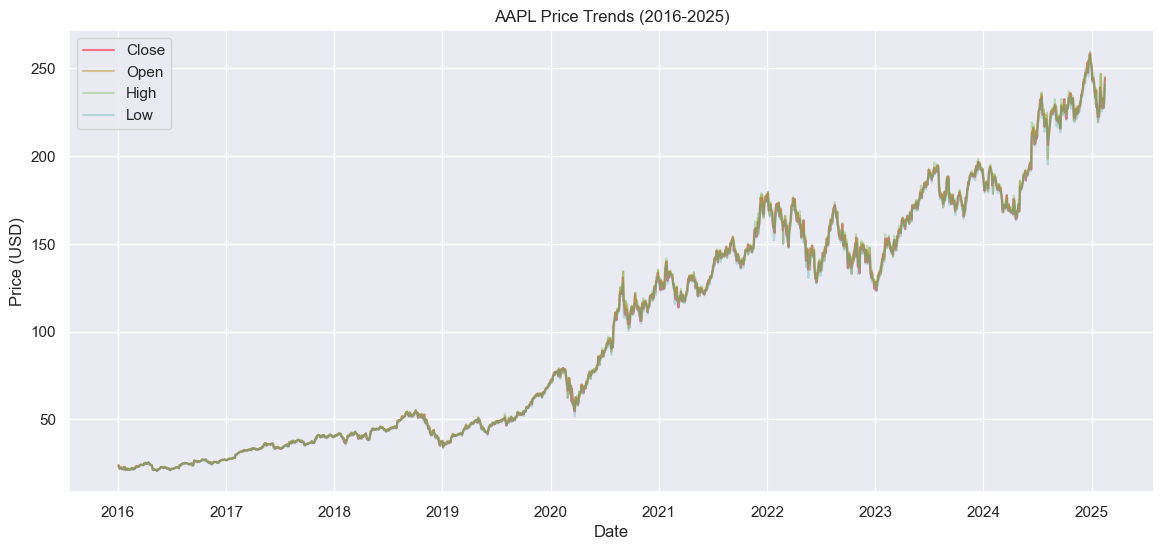

In [9]:
sns.lineplot(data=aapl_data, x=aapl_data.index, y='Close', label='Close')
sns.lineplot(data=aapl_data, x=aapl_data.index, y='Open', label='Open', alpha=0.5)
sns.lineplot(data=aapl_data, x=aapl_data.index, y='High', label='High', alpha=0.3)
sns.lineplot(data=aapl_data, x=aapl_data.index, y='Low', label='Low', alpha=0.3)
plt.title('AAPL Price Trends (2016-2025)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

<h4/> Close Price (Last Year Zoom-in)

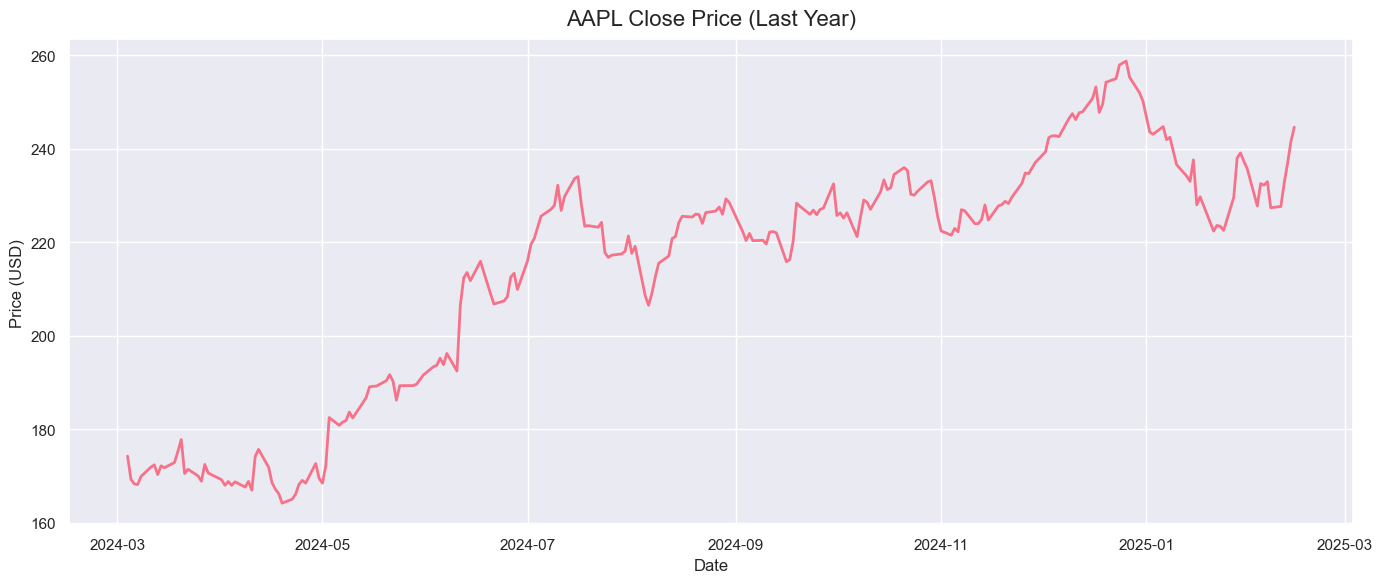

In [10]:
last_year = aapl_data[aapl_data.index >= '2024-03-04']

plt.figure()
sns.lineplot(data=last_year, x=last_year.index, y='Close', linewidth=2)
plt.title('AAPL Close Price (Last Year)', fontsize=16, pad=10)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.tight_layout()
plt.show()

<h4/> Close Price Distribution

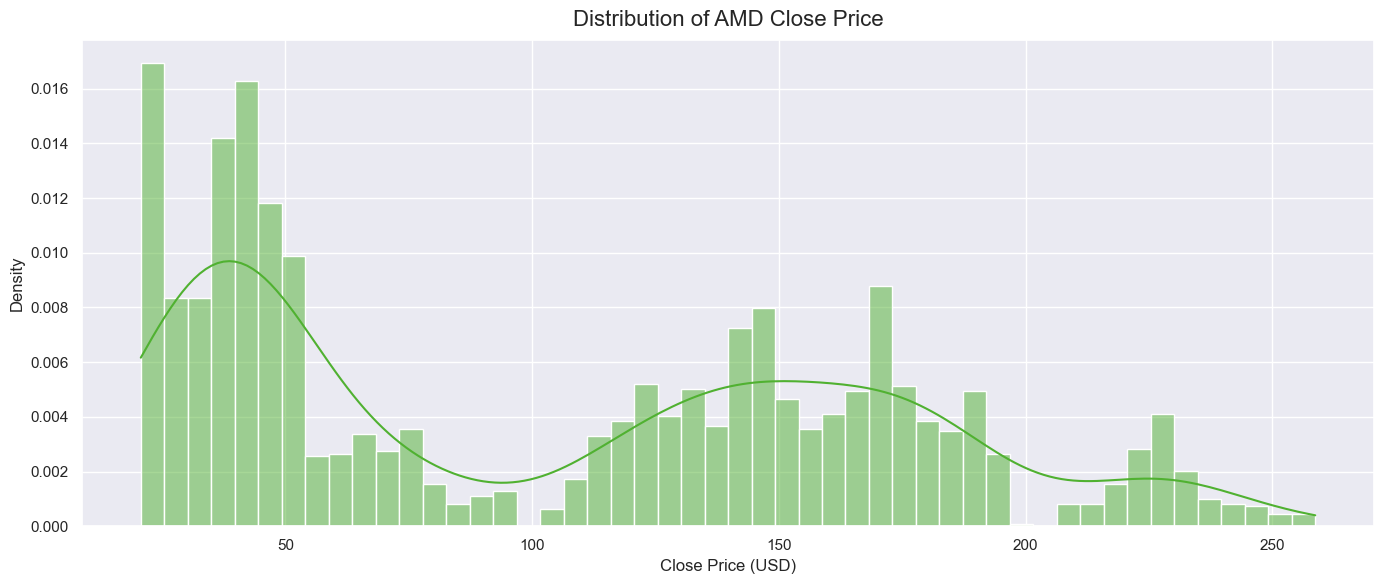

In [11]:
plt.figure()
sns.histplot(data=aapl_data, x='Close', bins=50, kde=True, color=sns.color_palette("husl")[2], stat='density')
plt.title('Distribution of AMD Close Price', fontsize=16, pad=10)
plt.xlabel('Close Price (USD)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.tight_layout()
plt.show()

<h4/> ADF Test for Stationarity

In [12]:
adf_result = adfuller(aapl_data['Close'].dropna())
print("ADF Test for Stationarity (Close):")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print("Stationary" if adf_result[1] < 0.05 else "Non-Stationary")

ADF Test for Stationarity (Close):
ADF Statistic: 0.28340761424287386
p-value: 0.976570299379378
Non-Stationary


<h4/> Daily Returns Time Series Plot

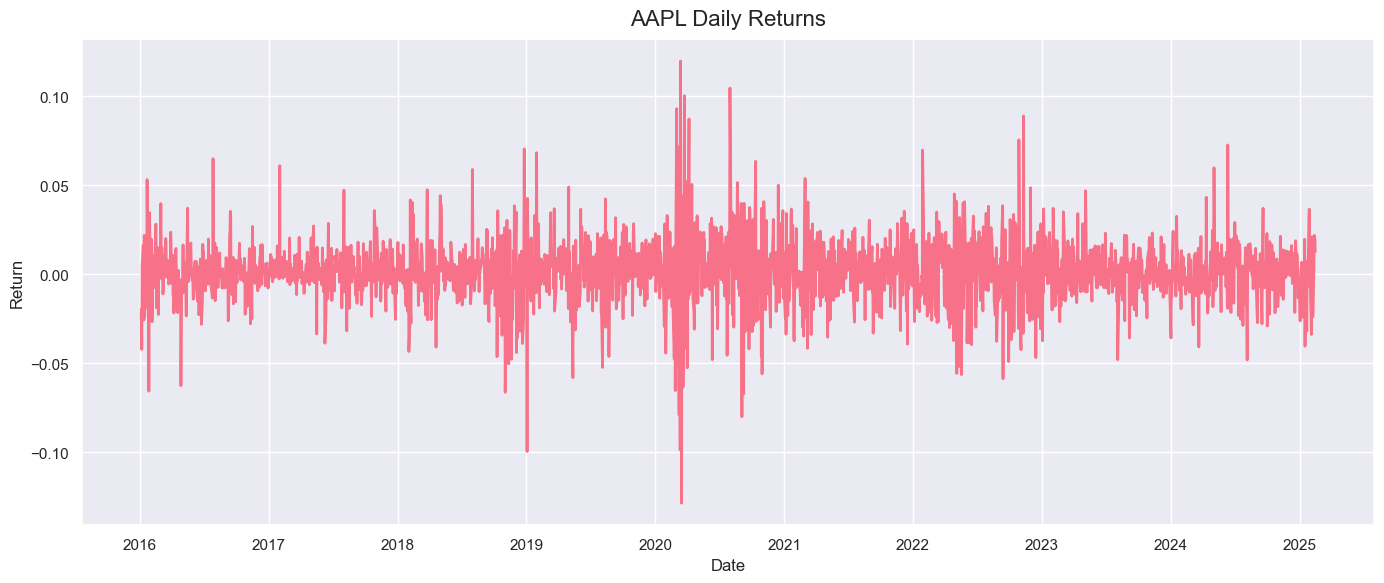

In [13]:
returns = aapl_data['Close'].pct_change().dropna()
returns_df = pd.DataFrame({'Returns': returns}, index=returns.index)
plt.figure()
sns.lineplot(data=returns_df, x=returns_df.index, y='Returns', linewidth=2)
plt.title('AAPL Daily Returns', fontsize=16, pad=10)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Return', fontsize=12)
plt.tight_layout()
plt.show()

<h4/> Correlation Matrix

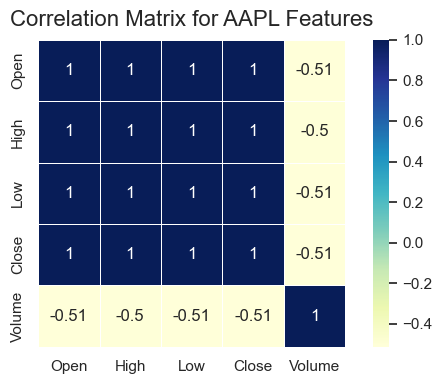

In [14]:
plt.figure(figsize=(6, 4))
sns.heatmap(aapl_data[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='YlGnBu', 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix for AAPL Features', fontsize=16, pad=10)
plt.tight_layout()
plt.show()

<h4/> Rolling Mean and Std Dev

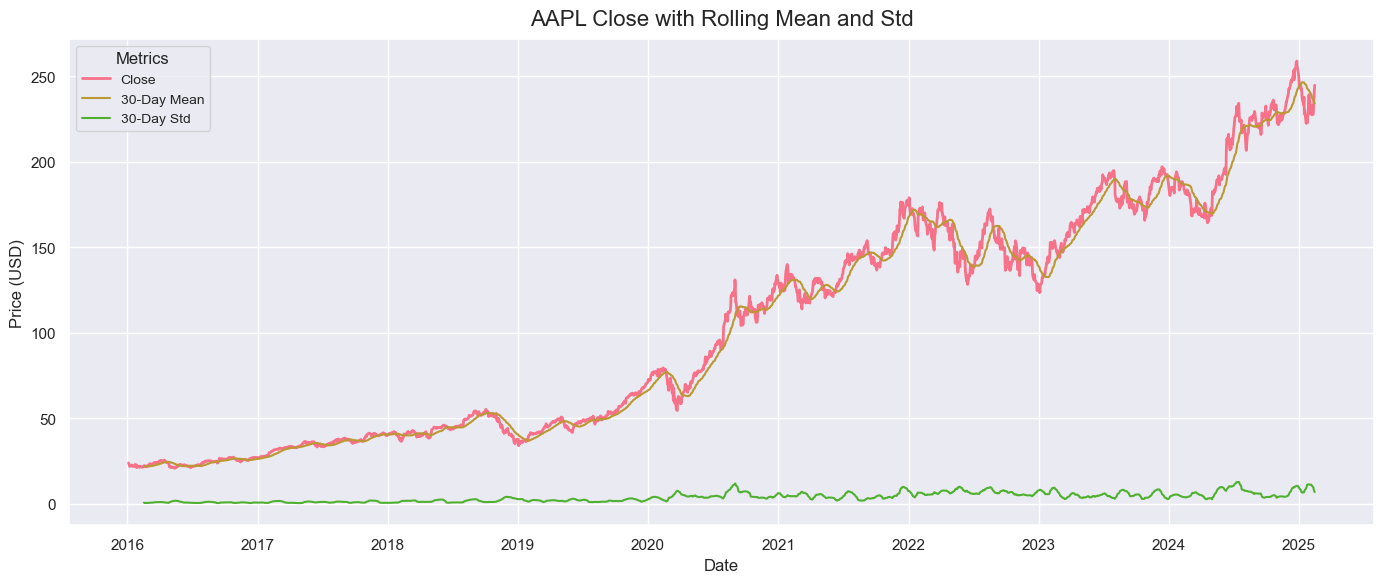

In [16]:
rolling_mean = aapl_data['Close'].rolling(window=30).mean()
rolling_std = aapl_data['Close'].rolling(window=30).std()
rolling_df = pd.DataFrame({'Close': aapl_data['Close'], '30-Day Mean': rolling_mean, '30-Day Std': rolling_std})
plt.figure()
sns.lineplot(data=rolling_df, x=rolling_df.index, y='Close', label='Close', linewidth=2)
sns.lineplot(data=rolling_df, x=rolling_df.index, y='30-Day Mean', label='30-Day Mean', linewidth=1.5)
sns.lineplot(data=rolling_df, x=rolling_df.index, y='30-Day Std', label='30-Day Std', linewidth=1.5)
plt.title('AAPL Close with Rolling Mean and Std', fontsize=16, pad=10)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend(title='Metrics', fontsize=10)
plt.tight_layout()
plt.show()